In [1]:
import numpy as np
import matplotlib.pyplot as plt
from grizli import utils
from astropy.utils.data import download_file
import os
from speclite import filters
from astropy.io import fits
import astropy.units as u

import astropy
import msaexp.spectrum
from numba import njit

# Read the Table from DJA of Emission lines

In [2]:
# All MSAexp PRISM spectra in a single table
combined_spectra_file = "dja_msaexp_emission_lines_v4.0.prism_spectra.fits"

if os.path.exists(combined_spectra_file):
    prism_spectra = utils.read_catalog(combined_spectra_file)
else:
    # Combined prism spectra in a single big table (595 Mb)
    prism_spectra = utils.read_catalog(
        download_file(
            f"https://s3.amazonaws.com/msaexp-nirspec/extractions/{combined_spectra_file}",
            cache=True
        ),
        format='fits',
    )
    


# Load the complete table
table_url = "https://s3.amazonaws.com/msaexp-nirspec/extractions/dja_msaexp_emission_lines_v4.0.csv.gz"
tab = utils.read_catalog(download_file(table_url, cache=True), format='csv')
# Column descriptions
columns_url = "https://s3.amazonaws.com/msaexp-nirspec/extractions/dja_msaexp_emission_lines_v4.0.columns.csv"
tab_columns = utils.read_catalog(download_file(columns_url, cache=True), format='csv')

# Set column metadata
for row in tab_columns:
    c = row['column']
    if row['unit'] != '--':
        tab[c].unit = row['unit']
    if row['format'] != '--':
        tab[c].format = row['format']
    if row['description'] != '--':
        tab[c].description = row['description']
tab.info()

<GTable length=52181>
        name         dtype   unit  format                                       description                                           class     n_bad
------------------- ------- ------ ------ ---------------------------------------------------------------------------------------- ------------ -----
               file   str57                                                                                           DJA filename       Column     0
              srcid   int64                                                                                Source ID from APT plan       Column     0
                 ra float64    deg    .8f                                                                         RA from APT plan       Column     0
                dec float64    deg    .8f                                                                        Dec from APT plan       Column     0
            grating    str5                                                   

import the LRDs

In [3]:
#Darachs:
spec_file=['jades-gdn-v4_prism-clear_1181_68797.spec.fits',
           'jades-gdn09-v4_prism-clear_1181_73488.spec.fits',
           'rubies-egs53-v4_prism-clear_4233_42046.spec.fits',
           'rubies-egs63-v4_prism-clear_4233_49140.spec.fits',
           'ceers-v4_prism-clear_1345_1244.spec.fits',
           'jades-gdn-v4_prism-clear_1181_53501.spec.fits',
           'egs-nelsonx-v4_prism-clear_4106_51623.spec.fits',
           'rubies-egs62-v4_prism-clear_4233_58237.spec.fits',
           'jades-gdn-v4_prism-clear_1181_38147.spec.fits',
           'rubies-egs53-v4_prism-clear_4233_50052.spec.fits',
           'rubies-egs61-v4_prism-clear_4233_60935.spec.fits']

FITS_URL = "https://s3.amazonaws.com/msaexp-nirspec/extractions/{root}/{file}"
is_prism = tab['grating'] == 'PRISM'
has_z_spec = tab['z_best'] >= 0
good_grade = tab['grade'] >= 3

prism_z = is_prism & has_z_spec & good_grade
LRD_MSAID = np.isin(tab[prism_z]['file'],spec_file)
row = tab[prism_z][LRD_MSAID]

def get_spectrum_from_dja(row):
    spec = msaexp.spectrum.SpectrumSampler(FITS_URL.format(**row))
    return spec
LRD_MSAID = np.isin(tab[prism_z]['srcid'],MSA_ID)

NameError: name 'MSA_ID' is not defined

In [4]:
#setton
spec_file=["macsj0647-v4_prism-clear_1433_1045.spec.fits",
              'jades-gdn-v4_prism-clear_1181_68797.spec.fits',
              'rubies-uds1-v4_prism-clear_4233_40579.spec.fits',
              'jades-gds-w03-v4_prism-clear_1212_537.spec.fits',
              'jades-gdn2-v4_prism-clear_1181_28074.spec.fits',
              'uncover-v4_prism-clear_2561_4286.spec.fits',
              'cosmos-transients-v4_prism-clear_6585_58018.spec.fits',
              'gds-deep-v4_prism-clear_1210_13704.spec.fits',
              'uncover-62-v4_prism-clear_2561_58453.spec.fits',
              'gds-barrufet-s67-v4_prism-clear_2198_4820.spec.fits',
              "rubies-uds3-v4_prism-clear_4233_47509.spec.fits",

              'ceers-ddt-v4_prism-clear_2750_1768.spec.fits',
              'jades-gdn-v4_prism-clear_1181_53501.spec.fits',
              'rubies-uds1-v4_prism-clear_4233_31747.spec.fits',
              'uncover-v4_prism-clear_2561_38108.spec.fits',
              'jades-gds-wide-v4_prism-clear_1180_13329.spec.fits',
              'jades-gdn09-v4_prism-clear_1181_73488.spec.fits',
              'jades-gds-wide-v4_prism-clear_1180_12402.spec.fits',
              'jades-gdn-v4_prism-clear_1181_38147.spec.fits',
              'jades-gdn10-v4_prism-clear_1181_27830.spec.fits']


FITS_URL = "https://s3.amazonaws.com/msaexp-nirspec/extractions/{root}/{file}"
is_prism = tab['grating'] == 'PRISM'
has_z_spec = tab['z_best'] >= 0
good_grade = tab['grade'] >= 3

prism_z = is_prism & has_z_spec & good_grade
LRD_MSAID = np.isin(tab[prism_z]['file'],spec_file)
row = tab[prism_z][LRD_MSAID]

def get_spectrum_from_dja(row,redshift=False):
    spec = msaexp.spectrum.SpectrumSampler(FITS_URL.format(**row))#.spec

    wave = ((spec.spec['wave']* u.micron).to(u.AA))
    # Convert to FLAM
    flux = (spec.spec['flux'] * spec.spec['to_flam'] * u.uJy).to(u.erg / u.cm**2 / u.s / u.AA, equivalencies=u.spectral_density(wave))
    err  = (spec.spec['err'] * u.uJy).to(u.erg / u.cm**2 / u.s / u.AA, equivalencies=u.spectral_density(wave))
    # flux = spec['flux']*spec['to_flam']
    
    if redshift:
        zspec= row['z_best']
        return wave/(1+zspec) , flux, err
    return wave, flux, err


In [5]:
w,f,e= get_spectrum_from_dja(row[0],redshift=True)

Getting JWST NIRSpec Resolution

In [6]:
c=astropy.constants.c.to('km/s')
R_prism = fits.open('jwst_nirspec_prism_disp.fits')[1].data
def Resolution(L):
    return np.interp(L, R_prism['wavelength']*10**4, R_prism['R'])

# Fitting the templates to LRDs


Functions for rebinning and normalizing

In [7]:
def filter_flux_uncertainty_vec(
    wave_q: u.Quantity,
    filt_names,
    flux_q: u.Quantity,
    flux_sigma_q: u.Quantity,
):
    """
    Synthetic *energy‑integrating* band‑average flux densities and their
    1‑σ uncertainties for one or more filters – **units are preserved
    throughout**.

    See the docstring in the previous message for the full derivation.
    Nothing here strips units; every step uses Astropy's Quantity maths.
    """

    # ------------------------------------------------------------------
    # 0) normalise filt_names to a tuple
    # ------------------------------------------------------------------
    if isinstance(filt_names, (str)):
        filt_names = (filt_names,)
    else:
        filt_names = tuple(filt_names)

    lam        = wave_q           # Å
    f_lambda   = flux_q           # erg s^-1 cm^-2 Å^-1
    sigma_f    = flux_sigma_q

    # grid‑dependent helpers (all keep units)
    dlam       = lam[1:] - lam[:-1]          # Å
    half_dlam  = 0.5 * dlam                 # Å
    half_dlam2 = 0.25 * dlam**2             # Å²

    f_band_list, sig_list, pivot,width = [], [], [], []

    for fname in filt_names:
        filt = filters.load_filter(fname)
        R    = filt(lam)                    # dimensionless response

        R_sum   = R[:-1] + R[1:]
        RF_sum  = R[:-1]*f_lambda[:-1] + R[1:]*f_lambda[1:]
        var_sum = (R[:-1]*sigma_f[:-1])**2 + (R[1:]*sigma_f[1:])**2

        C_lambda = np.sum(half_dlam * RF_sum)        # erg s^-1 cm^-2
        W_lambda = np.sum(half_dlam * R_sum)         # Å
        f_band   = C_lambda / W_lambda               # erg s^-1 cm^-2 Å^-1

        var_C    = np.sum(half_dlam2 * var_sum)      # (erg s^-1 cm^-2)²
        sigma_fb = np.sqrt(var_C) / W_lambda         # erg s^-1 cm^-2 Å^-1

        width.append(W_lambda)                       # Å
        f_band_list.append(f_band)
        sig_list.append(sigma_fb)
        pivot.append(filt.effective_wavelength)      # Quantity
    # return C_lambda
    return f_band_list, sig_list, pivot, width

def _resample_template_instr_numba(
    spec_wobs: np.ndarray,
    spec_R_fwhm: np.ndarray,
    templ_wobs: np.ndarray,
    templ_flux: np.ndarray,
    templ_unc: np.ndarray | None,
    wave_min: float = 3000.0,
    wave_max: float = 1e5,
    nsig: int = 10,
    fill_value: float = np.nan,
):
    """Convolve *high‑res* template to target instrumental resolution & sample.

    Parameters
    ----------
    spec_wobs : float[N]
        Target wavelength grid (Å) — where the output will be evaluated.
    spec_R_fwhm : float[N]
        Resolving power R = λ/Δλ_FWHM *at the target grid.* Can be NaN; those
        pixels will be filled with ``fill_value``.
    templ_wobs : float[M]
        Native wavelength grid of the template to be degraded.
    templ_flux : float[M]
        Template flux.
    templ_unc : float[M] or None
        1σ uncertainty per template pixel (same grid as ``templ_flux``).
    nsig : int
        Half‑width of Gaussian kernel support in σ when convolving.

    Returns
    -------
    fres : float[N]
    ures : float[N]   (NaN if ``templ_unc`` None)
    """
    N = spec_wobs.size
    fres = np.empty(N, dtype=np.float64)
    if templ_unc is None:
        ures = np.empty(N, dtype=np.float64)
    else:
        ures = np.empty(N, dtype=np.float64)

    # Precompute template index array for interpolation to slices
    ix = np.arange(templ_wobs.size, dtype=np.int64)

    for i in range(N):
        lam0 = spec_wobs[i]
        R = spec_R_fwhm[i]
        if not np.isfinite(R):
            fres[i] = fill_value
            ures[i] = np.nan
            continue
        # Convert R -> Gaussian sigma in wavelength units
        # FWHM = lam/R ; sigma = FWHM / 2.35
        sigma = (lam0 / R) / 2.35
        dl = nsig * sigma

        # Bracket the contributing template points
        lam_lo = lam0 - dl
        lam_hi = lam0 + dl
        ilo = int(np.interp(lam_lo, templ_wobs, ix))
        ihi = int(np.interp(lam_hi, templ_wobs, ix)) + 1
        if ilo < 0:
            ilo = 0
        if ihi > templ_wobs.size:
            ihi = templ_wobs.size
        if ihi <= ilo + 1:  # no width → fill
            fres[i] = fill_value
            ures[i] = np.nan
            continue

        lam_slice = templ_wobs[ilo:ihi]
        f_slice = templ_flux[ilo:ihi]
        # Gaussian kernel (not strictly normalised over irregular lam grid; we integrate)
        g = np.exp(-0.5 * ((lam_slice - lam0) / sigma) ** 2) / (np.sqrt(2.0 * np.pi) * sigma)
        fres[i] = np.trapz(f_slice * g, lam_slice)

        if templ_unc is not None:
            u_slice = templ_unc[ilo:ihi]
            ures[i] = np.sqrt(np.trapz((u_slice**2) * (g**2), lam_slice))
        else:
            ures[i] = np.nan
        
    return fres, ures


## Sy1

In [8]:
Sy1=fits.open("AGN_templates/seyfert1_template.fits")
lamda=Sy1[1].data['WAVELENGTH'][10:-10]
flux=Sy1[1].data['FLUX'][10:-10]

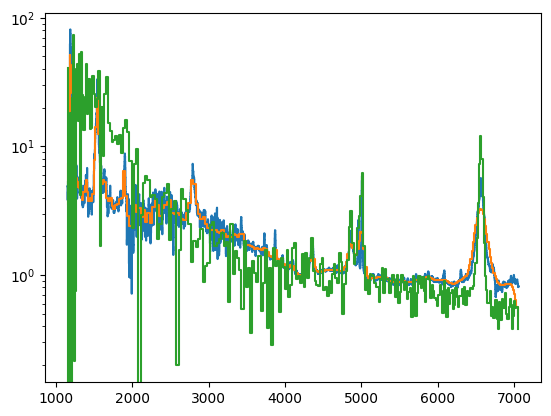

In [9]:
n=filter_flux_uncertainty_vec(lamda * u.AA, 'bessell-V', flux *(u.erg/u.s/u.cm**2/u.AA), np.zeros_like(flux) * u.erg / u.cm**2 / u.s / u.AA)
f_=_resample_template_instr_numba(spec_wobs=w.value,
    spec_R_fwhm=Resolution(w.value),
    templ_wobs=lamda,
    templ_flux=flux/n[0][0].value,
    templ_unc=None,
    wave_min=3000.0,
    wave_max=1e5,
    nsig=10,
    fill_value=np.nan,
)

ne=filter_flux_uncertainty_vec(w, 'bessell-V', f, e)


x=lamda
y=flux/n[0][0]
lowhigh= np.max([np.min(x), np.min(w.value)])
highlow= np.min([np.max(x), np.max(w.value)])
clip=( (w.value>lowhigh) & (w.value < highlow) )
clip2= ( (x>lowhigh) & (x < highlow) )

plt.step(x[clip2],y[clip2], where='mid')
plt.step(w[clip],f_[0][clip], where='mid')
plt.step(w[clip],f[clip]/ne[0][0], where='mid')
plt.yscale('log')

## Sy2

In [10]:
Sy2=fits.open("AGN_templates/seyfert2_template.fits")
lamda=Sy2[1].data['WAVELENGTH'][10:-10]
flux=Sy2[1].data['FLUX'][10:-10]

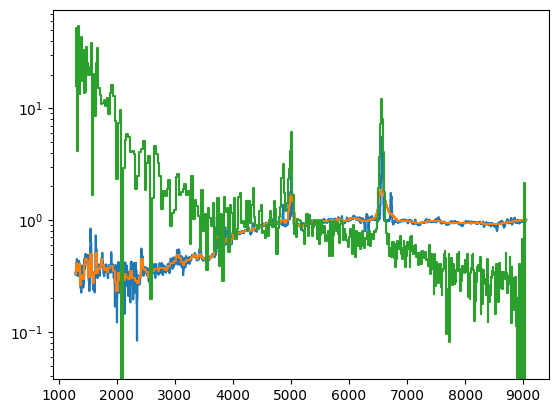

In [11]:
n=filter_flux_uncertainty_vec(lamda * u.AA, 'bessell-V', flux *(u.erg/u.s/u.cm**2/u.AA), np.zeros_like(flux) * u.erg / u.cm**2 / u.s / u.AA)
f_=_resample_template_instr_numba(spec_wobs=w.value,
    spec_R_fwhm=Resolution(w.value),
    templ_wobs=lamda,
    templ_flux=flux/n[0][0].value,
    templ_unc=None,
    wave_min=3000.0,
    wave_max=1e5,
    nsig=5,
    fill_value=np.nan,
)

ne=filter_flux_uncertainty_vec(w, 'bessell-V', f, e)


x=lamda
y=flux/n[0][0]
lowhigh= np.max([np.min(x), np.min(w.value)])
highlow= np.min([np.max(x), np.max(w.value)])
clip=( (w.value>lowhigh) & (w.value < highlow) )
clip2=( (x>lowhigh) & (x < highlow) )
plt.step(x[clip2],y[clip2], where='mid')
plt.step(w[clip],f_[0][clip], where='mid')
plt.step(w[clip],f[clip]/ne[0][0], where='mid')
plt.yscale('log')

## LINER

In [12]:
liner=fits.open("AGN_templates/liner_template.fits")
lamda=liner[1].data['WAVELENGTH'][10:-10]
flux=liner[1].data['FLUX'][10:-10]

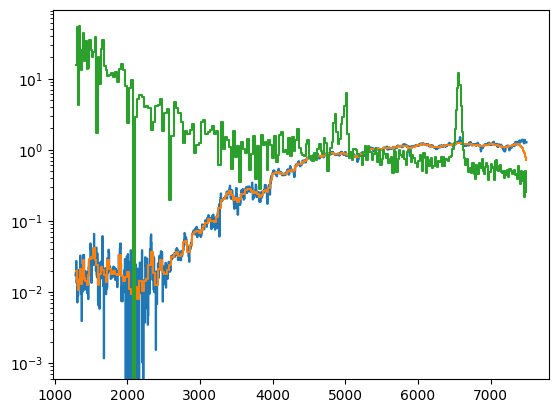

In [13]:
n=filter_flux_uncertainty_vec(lamda * u.AA, 'bessell-V', flux *(u.erg/u.s/u.cm**2/u.AA), np.zeros_like(flux) * u.erg / u.cm**2 / u.s / u.AA)
f_=_resample_template_instr_numba(spec_wobs=w.value,
    spec_R_fwhm=Resolution(w.value),
    templ_wobs=lamda,
    templ_flux=flux/n[0][0].value,
    templ_unc=None,
    wave_min=3000.0,
    wave_max=1e5,
    nsig=5,
    fill_value=np.nan,
)

ne=filter_flux_uncertainty_vec(w, 'bessell-V', f, e)


x=lamda
y=flux/n[0][0]
lowhigh= np.max([np.min(x), np.min(w.value)])
highlow= np.min([np.max(x), np.max(w.value)])
clip=( (w.value>lowhigh) & (w.value < highlow) )
clip2=( (x>lowhigh) & (x < highlow) )
plt.step(x[clip2],y[clip2], where='mid')
plt.step(w[clip],f_[0][clip], where='mid')
plt.step(w[clip],f[clip]/ne[0][0], where='mid')
plt.yscale('log')

## QSO

In [14]:
qso=fits.open("AGN_templates/qso_template.fits")
lamda=qso[1].data['WAVELENGTH'][10:-10]
flux=qso[1].data['FLUX'][10:-10]

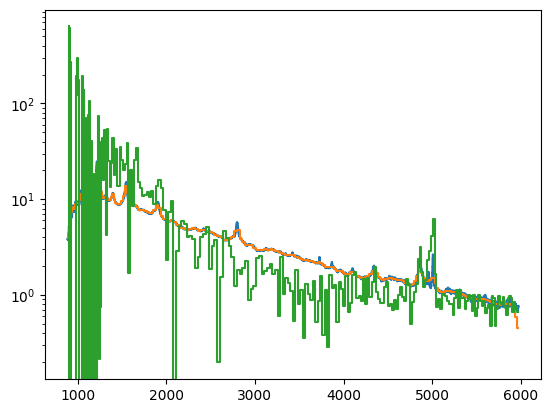

In [15]:
n=filter_flux_uncertainty_vec(lamda * u.AA, 'bessell-V', flux *(u.erg/u.s/u.cm**2/u.AA), np.zeros_like(flux) * u.erg / u.cm**2 / u.s / u.AA)
f_=_resample_template_instr_numba(spec_wobs=w.value,
    spec_R_fwhm=Resolution(w.value),
    templ_wobs=lamda,
    templ_flux=flux/n[0][0].value,
    templ_unc=None,
    wave_min=3000.0,
    wave_max=1e5,
    nsig=5,
    fill_value=np.nan,
)

ne=filter_flux_uncertainty_vec(w, 'bessell-V', f, e)


x=lamda
y=flux/n[0][0]
lowhigh= np.max([np.min(x), np.min(w.value)])
highlow= np.min([np.max(x), np.max(w.value)])
clip=( (w.value>lowhigh) & (w.value < highlow) )
clip2=( (x>lowhigh) & (x < highlow) )
plt.step(x[clip2],y[clip2], where='mid')
plt.step(w[clip],f_[0][clip], where='mid')
plt.step(w[clip],f[clip]/ne[0][0], where='mid')
plt.yscale('log')

## NGC1068

In [16]:
ngc1068=fits.open("AGN_templates/ngc1068_template.fits")
lamda=ngc1068[1].data['WAVELENGTH'][10:-10]
flux=ngc1068[1].data['FLUX'][10:-10]

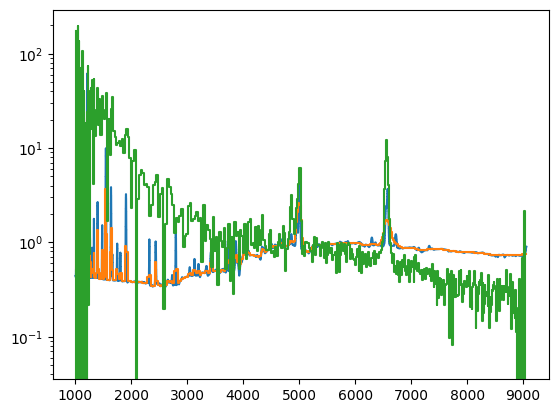

In [17]:

n=filter_flux_uncertainty_vec(lamda * u.AA, 'bessell-V', flux *(u.erg/u.s/u.cm**2/u.AA), np.zeros_like(flux) * u.erg / u.cm**2 / u.s / u.AA)
f_=_resample_template_instr_numba(spec_wobs=w.value,
    spec_R_fwhm=Resolution(w.value),
    templ_wobs=lamda,
    templ_flux=flux/n[0][0].value,
    templ_unc=None,
    wave_min=3000.0,
    wave_max=1e5,
    nsig=5,
    fill_value=np.nan,
)

ne=filter_flux_uncertainty_vec(w, 'bessell-V', f, e)


x=lamda
y=flux/n[0][0]
lowhigh= np.max([np.min(x), np.min(w.value)])
highlow= np.min([np.max(x), np.max(w.value)])
clip=( (w.value>lowhigh) & (w.value < highlow) )
clip2=( (x>lowhigh) & (x < highlow) )
plt.step(x[clip2],y[clip2], where='mid')
plt.step(w[clip],f_[0][clip], where='mid')
plt.step(w[clip],f[clip]/ne[0][0], where='mid')
plt.yscale('log')

## Define Dust model to fit

### Attenuation

In [18]:
from dust_attenuation.radiative_transfer import WG00

In [19]:
w[clip]

<Quantity [1010.31077671, 1017.46568615, 1024.76396298, 1032.20980171,
           1039.80757466, 1047.56183654, 1055.47732898, 1063.55912402,
           1071.8124166 , 1080.24248917, 1088.85482302, 1097.65510467,
           1106.6492298 , 1115.84330386, 1125.24364596, 1134.85679305,
           1144.6894986 , 1154.7487357 , 1165.04170184, 1175.57590375,
           1186.35913381, 1197.39928228, 1208.70445788, 1220.2829854 ,
           1232.1436135 , 1244.29523175, 1256.74680821, 1269.50770279,
           1282.5874281 , 1295.99556608, 1309.74208831, 1323.83686978,
           1338.29010805, 1353.11194681, 1368.31263884, 1383.90246277,
           1399.89163026, 1416.29029809, 1433.10845747, 1450.3558854 ,
           1468.04210035, 1486.17626362, 1504.76710577, 1523.82283245,
           1543.3510421 , 1563.35864946, 1583.85159299, 1604.83495748,
           1626.31296151, 1648.28860932, 1670.76346018, 1693.73825279,
           1717.21162124, 1741.18138428, 1765.64345706, 1790.59209231,
      

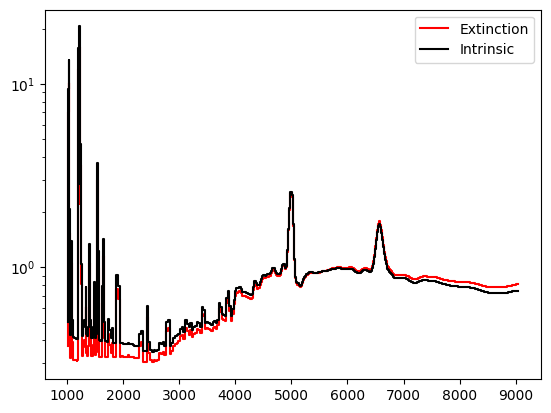

In [ ]:
tau_=1
att_model=WG00(tau_V=tau_,
                 geometry='cloudy',
                 dust_type='SMC',
                 dust_distribution='clumpy')

_f_pivot=att_model. (n[-2],tau_V=tau_)

_f=att_model.evaluate(w[clip],tau_V=tau_)

#in wavelegnth units

_f= 10**(-0.4*(_f-_f_pivot))
plt.step(w[clip],_f*f_[0][clip], where='mid',c='red',label='Extinction')
plt.step(w[clip],f_[0][clip], where='mid',c='black',label='Intrinsic')
plt.legend()
plt.yscale('log')

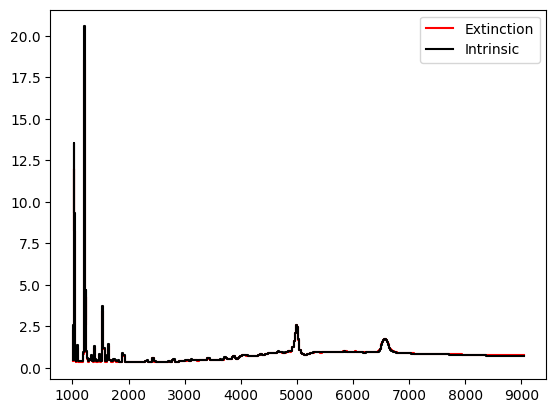

In [21]:
tau_=25
att_model=WG00(tau_V=tau_,
                 geometry='cloudy',
                 dust_type='SMC',
                 dust_distribution='clumpy')

_f_pivot=att_model.evaluate(n[-2],tau_V=tau_)

_f=att_model.evaluate(w[clip],tau_V=tau_)

#in wavelegnth units


_f= 10**(-0.4*(_f-_f_pivot))
plt.step(w[clip],_f*f_[0][clip], where='mid',c='red',label='Extinction')
plt.step(w[clip],f_[0][clip], where='mid',c='black',label='Intrinsic')
plt.legend()


### Extinction

In [32]:
from dust_extinction.averages import G24_SMCAvg   # SMC average law


ext = G24_SMCAvg()

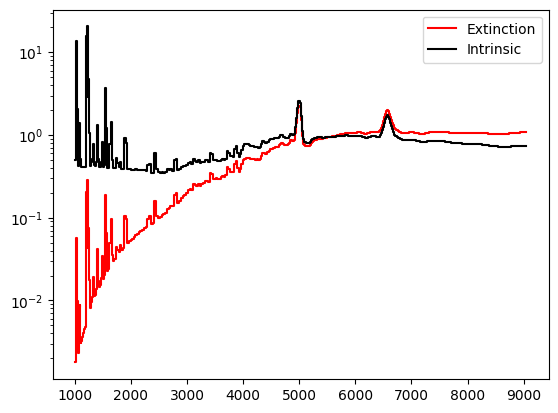

In [37]:
a_v= 1


A_A_V= ext(w[clip])

A_lambda= a_v * A_A_V

A_normalize= ext(n[-2][0]) * a_v

_f = 10**(-0.4 * (A_lambda - A_normalize))

plt.step(w[clip],_f*f_[0][clip], where='mid',c='red',label='Extinction')
plt.step(w[clip],f_[0][clip], where='mid',c='black',label='Intrinsic')
plt.legend()
plt.yscale('log')


